___

1. Понять, сначала подкачиваются данные с региона в БД, а после выгружаются и применяется графовый алгоритм или наоборот
2. Подключить БД
3. Разобраться с OSM API и попробовать методы на каком-нибудь регионе
4. После попробовать загрузить полученные данные в БД
5. Разработать графовый алгоритм 

___

**Знакомство с OSMnx**

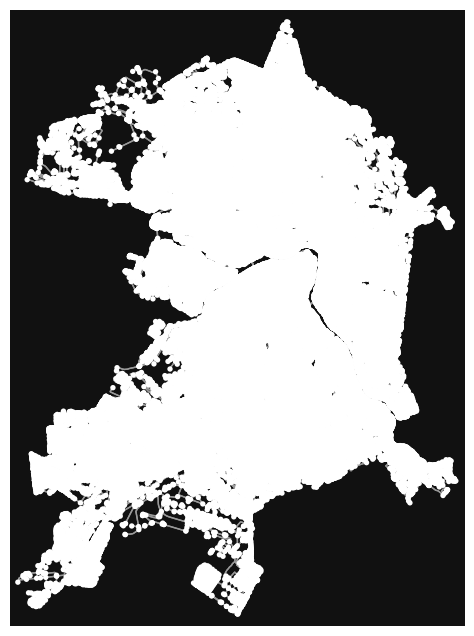

In [1]:
''' https://taginfo.openstreetmap.org '''
''' https://wiki.openstreetmap.org/wiki/Map_features#Route '''
''' https://wiki.openstreetmap.org/wiki/RU:Объекты_карты '''
''' https://python.hotexamples.com/examples/osmnx/-/graph_from_place/python-graph_from_place-function-examples.html '''

import osmnx as ox
import pandas as pd

pd.set_option('display.max_columns', None) 

G = ox.graph_from_place("Saint Petersburg", retain_all=True, simplify = True, network_type='all')
fig, ax = ox.plot_graph(G)

In [2]:
G

In [3]:
geocode_gdf = ox.geocode_to_gdf('Saint Petersburg')
geocode_gdf.columns

Index(['geometry', 'bbox_north', 'bbox_south', 'bbox_east', 'bbox_west',
       'place_id', 'osm_type', 'osm_id', 'lat', 'lon', 'class', 'type',
       'place_rank', 'importance', 'addresstype', 'name', 'display_name'],
      dtype='object')

In [4]:
boundaries = geocode_gdf["geometry"]
boundaries

0    POLYGON ((30.04334 59.76418, 30.04382 59.76239...
Name: geometry, dtype: geometry

In [5]:
geocode_gdf[['lat', 'lon']]
(*geocode_gdf[['lat']].iloc[0].values, *geocode_gdf[['lon']].iloc[0].values)

(59.938732, 30.316229)

In [6]:
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)
gdf_nodes, gdf_relationships

(                     y          x  street_count          highway  ref  \
 osmid                                                                   
 219808       59.895094  30.331422             3              NaN  NaN   
 219811       59.899301  30.337475             3              NaN  NaN   
 219812       59.901731  30.339552             4  traffic_signals  NaN   
 219816       59.909809  30.346880             4  traffic_signals  NaN   
 219818       59.912044  30.348371             4  traffic_signals  NaN   
 ...                ...        ...           ...              ...  ...   
 12228265489  59.852832  30.236825             4              NaN  NaN   
 12228266937  59.932136  30.332768             3              NaN  NaN   
 12228266940  59.931971  30.332825             3              NaN  NaN   
 12228267374  59.856619  30.212444             1   turning_circle  NaN   
 12228290186  59.854965  30.281877             4              NaN  NaN   
 
                               geome

In [7]:
df_center = geocode_gdf[["lat", "lon"]]
df_center
# create_graph(driver, df_center, gdf_nodes, gdf_relationships)

,lat,lon
0,59.938732,30.316229


In [8]:
gdf_nodes.reset_index(inplace=True)
gdf_relationships.reset_index(inplace=True)
gdf_nodes["geometry_wkt"] = gdf_nodes["geometry"].apply(lambda x: x.wkt)
gdf_relationships["geometry_wkt"] = gdf_relationships["geometry"].apply(lambda x: x.wkt)

___

**Нахождение портов в Санкт-Петебурге**

In [40]:
# https://wiki.openstreetmap.org/wiki/RU:Marine_Mapping#Морские_карты

tags = {'industrial' : 'port'}
gdf = ox.features_from_place('Saint Petersburg', tags)

# gdf = gdf[['name', 'official_name']].dropna(how='all').reset_index()
gdf

geometry  \
element_type osmid                                                          
way          55752588   POLYGON ((30.20579 59.87000, 30.20715 59.86948...   
             136355342  POLYGON ((30.20885 59.88225, 30.20867 59.88216...   
             136355343  POLYGON ((30.21001 59.88024, 30.21024 59.88037...   
             136355344  POLYGON ((30.21649 59.87602, 30.21588 59.87632...   
             136450911  POLYGON ((30.23869 59.91024, 30.23647 59.90991...   
             704134882  POLYGON ((30.17885 59.94521, 30.17863 59.94511...   
relation     1576043    POLYGON ((30.16799 59.88702, 30.16898 59.88680...   
             14997952   POLYGON ((30.21011 59.87268, 30.20973 59.87283...   

                                                                    nodes  \
element_type osmid                                                          
way          55752588   [700371906, 7194252008, 7194252007, 700371673,...   
             136355342  [1495854450, 1495854446, 1495854443, 149585441...   
             136355343  [1495854361, 1495854367, 1495854405, 149585443...   
             136355344  [29003159, 29003160, 29003162, 1546437843, 149...   
             136450911  [1496678744, 1496678741, 1496678737, 149667873...   
             704134882  [6611604897, 11865582544, 6611626313, 66116048...   
relation     1576043    [[[29003480, 29003481, 29003482, 7709497986, 7...   
             14997952   [[[1546412162, 29003297, 29003292, 29003290, 2...   

                       industrial     landuse  \
element_type osmid                              
way          55752588        port  industrial   
             136355342       port  industrial   
             136355343       port  industrial   
             136355344       port  industrial   
             136450911       port  industrial   
             704134882       port  industrial   
relation     1576043         port  industrial   
             14997952        port  industrial   

                                                   name  \
element_type osmid                                        
way          55752588               Морской рыбный порт   
             136355342      Третья стивидорная компания   
             136355343                      Нева-Металл   
             136355344     Первый Контейнерный Терминал   
             136450911      Первая стивидорная компания   
             704134882                    Морской фасад   
relation     1576043    Петербургский нефтяной терминал   
             14997952                               NaN   

                                             official_name       port  \
element_type osmid                                                      
way          55752588            ООО "Морской Рыбный Порт"    fishing   
             136355342  ОАО "Морской порт Санкт-Петербург"      cargo   
             136355343                                 NaN      cargo   
             136355344                                 NaN      cargo   
             136450911  ОАО "Морской порт Санкт-Петербург"      cargo   
             704134882                                 NaN  passenger   
relation     1576043                                   NaN      cargo   
             14997952                                  NaN      cargo   

                                                      contact:website  \
element_type osmid                                                      
way          55752588                                             NaN   
             136355342  http://www.seaport.spb.ru/about/structure/13/   
             136355343                                            NaN   
             136355344         http://www.container.ru/terminals/spb/   
             136450911  http://www.seaport.spb.ru/about/structure/13/   
             704134882                                            NaN   
relation     1576043                                              NaN   
             14997952                                

**Формирование идентификатора**

In [10]:
def func(x):
    return x[0]
gdf['n_osmid'] = gdf['element_type'].apply(func) + gdf['osmid'].astype(str)
gdf

,element_type,osmid,name,official_name,n_osmid
0,way,55752588,Морской рыбный порт,"ООО ""Морской Рыбный Порт""",w55752588
1,way,136355342,Третья стивидорная компания,"ОАО ""Морской порт Санкт-Петербург""",w136355342
2,way,136355343,Нева-Металл,NaN,w136355343
3,way,136355344,Первый Контейнерный Терминал,NaN,w136355344
4,way,136450911,Первая стивидорная компания,"ОАО ""Морской порт Санкт-Петербург""",w136450911
5,way,704134882,Морской фасад,NaN,w704134882
6,relation,1576043,Петербургский нефтяной терминал,NaN,r1576043


**Нахождение координат центров - это будут координаты узлов**

In [11]:
def func_1(x):
    gdf_1 = ox.geocode_to_gdf(x, by_osmid=True)
    return gdf_1[['lat', 'lon']]
ex = [gdf['n_osmid'].apply(func_1).iloc[:].values[x] for x in range(len(gdf))]
dfs = pd.concat(ex, axis=0).reset_index(drop=True)
gdf = gdf.merge(dfs, on=dfs.index)
gdf = gdf.drop('key_0', axis=1)
gdf

,element_type,osmid,name,official_name,n_osmid,lat,lon
0,way,55752588,Морской рыбный порт,"ООО ""Морской Рыбный Порт""",w55752588,59.868541,30.211642
1,way,136355342,Третья стивидорная компания,"ОАО ""Морской порт Санкт-Петербург""",w136355342,59.878970,30.213249
2,way,136355343,Нева-Металл,NaN,w136355343,59.884243,30.203732
3,way,136355344,Первый Контейнерный Терминал,NaN,w136355344,59.879917,30.205881
4,way,136450911,Первая стивидорная компания,"ОАО ""Морской порт Санкт-Петербург""",w136450911,59.900097,30.223462
5,way,704134882,Морской фасад,NaN,w704134882,59.948070,30.194203
6,relation,1576043,Петербургский нефтяной терминал,NaN,r1576043,59.883287,30.175183


**Формирование финального результата**

In [12]:
final_port_df = gdf[['name', 'lat', 'lon']]
final_port_df

,name,lat,lon
0,Морской рыбный порт,59.868541,30.211642
1,Третья стивидорная компания,59.878970,30.213249
2,Нева-Металл,59.884243,30.203732
3,Первый Контейнерный Терминал,59.879917,30.205881
4,Первая стивидорная компания,59.900097,30.223462
5,Морской фасад,59.948070,30.194203
6,Петербургский нефтяной терминал,59.883287,30.175183


**Второй способ**

In [38]:
filter_marine = '["industrial"~"port"]'
G1 = ox.graph_from_place('Saint Petersburg', simplify=True, retain_all=True, custom_filter=filter_marine)#, custom_filter=filter_marine)
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G1)
gdf_nodes

,y,x,street_count,geometry
osmid,,,,
29003192,59.886545,30.198113,4,POINT (30.19811 59.88654)
1495854267,59.876530,30.214014,4,POINT (30.21401 59.87653)
1495854289,59.877097,30.213129,4,POINT (30.21313 59.87710)
1495854331,59.878231,30.211933,4,POINT (30.21193 59.87823)
1495854351,59.879637,30.210979,4,POINT (30.21098 59.87964)
1495854361,59.880242,30.210007,4,POINT (30.21001 59.88024)
1495854444,59.881806,30.206985,4,POINT (30.20698 59.88181)
1495854453,59.885279,30.200381,4,POINT (30.20038 59.88528)
8422239589,59.881700,30.207286,4,POINT (30.20729 59.88170)


____

**Нахождение аэропортов в Санкт-Петербурге**

In [4]:
# filtr = ('["aeroway"~"aerodrome|heliport|airstrip"]')
# G1 = ox.graph_from_place('Saint Petersburg', custom_filter=filtr)
# gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G1)
# gdf_nodes

tags_airport = {'aeroway' : ['aerodrome','heliport', 'airstrip']} # , 'heliport', 'airstrip'} aerodrome 	helipad
gdf_airport = ox.features_from_place('Saint Petersburg', tags_airport)
gdf_airport

barrier                                    name  \
element_type osmid                                                       
way          394536915   fence  Национальная Служба Санитарной Авиации   
relation     1187316       NaN                                 Пулково   
             5939571       NaN                                Горелово   

                                                                 geometry  \
element_type osmid                                                          
way          394536915  POLYGON ((30.25103 59.82901, 30.25108 59.82903...   
relation     1187316    POLYGON ((30.19901 59.80180, 30.19927 59.80236...   
             5939571    POLYGON ((30.08709 59.77654, 30.08712 59.77653...   

                         ref           phone               name:en  \
element_type osmid                                                   
way          394536915  УЛЛО             NaN                   NaN   
relation     1187316     NaN             NaN       Pulkovo Airport   
             5939571     NaN  +7 965 0185770  Gorelovo (aerodrome)   

                                                       name:ru  \
element_type osmid                                               
way          394536915  Национальная Служба Санитарной Авиации   
relation     1187316                                   Пулково   
             5939571                                       NaN   

                                                                    nodes  \
element_type osmid                                                          
way          394536915  [3770275444, 3362957480, 3770275445, 376706017...   
relation     1187316    [[[1366336215, 898627137, 898627136, 898627135...   
             5939571    [[[2583764932, 5154999590, 2583764933, 5154999...   

                          aeroway local_ref  ... iata  icao  name:de  \
element_type osmid                           ...                       
way          394536915   heliport      ULLO  ...  NaN   NaN      NaN   
relation     1187316    aerodrome       NaN  ...  LED  ULLI  Pulkowo   
             5939571    aerodrome      XLLE  ...  NaN   NaN      NaN   

                       name_with_accent name_with_accent:ru   old_name  \
element_type osmid                                                       
way          394536915              NaN                 NaN        NaN   
relation     1187316           Пу́лково            Пу́лково  Шоссейная   
             5939571                NaN                 NaN        NaN   

                                type  wikidata               wikipedia  \
element_type osmid                                                       
way          394536915           NaN       NaN                     NaN   
relation     1187316    multipolygon   Q690122   ru:Пулково (аэропорт)   
             5939571    multipolygon  Q7783780  ru:Горелово (аэродром)   

                                                              description  
element_type osmid                                                         
way          394536915                                                NaN  
relation     1187316                                                  NaN  
             5939571    Действующий аэродром совметного базирования ма...  

[3 rows x 27 columns]

Второй способ

In [27]:
# filter_air = '["aeroway"="heliport"]'
# G1 = ox.graph_from_place('Saint Petersburg', custom_filter=filter_air)
# gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G1)
# gdf_nodes
filter_air = '["aeroway"="aerodrome"]'
G1 = ox.graph_from_place('Saint Petersburg', simplify=True, retain_all=True, custom_filter=filter_air)
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G1)
gdf_nodes

InsufficientResponseError: No data elements in server response. Check query location/filters and log.

___

**Нахождение ЖД станций**

In [43]:
tags_train = {'usage' : 'industrial'} #  landuse=railway usage=industrial service=spur railway=station public_transport=platform
# man_made=crane
# building=industrial warehouse    
gdf_train = ox.features_from_place('Saint Petersburg', tags_train)
gdf_train

railway  \
element_type osmid                   
way          25080019    abandoned   
             33914012         rail   
             40724830         rail   
             42320712         rail   
             58696865         rail   
...                            ...   
             1173557869    disused   
             1173557870    disused   
             1267971089    disused   
             1290519628       rail   
             1319250618        NaN   

                                                                  geometry  \
element_type osmid                                                           
way          25080019    LINESTRING (30.27320 60.04595, 30.27309 60.045...   
             33914012    LINESTRING (30.25496 59.92814, 30.25482 59.928...   
             40724830    LINESTRING (30.49309 59.87828, 30.49279 59.879...   
             42320712    LINESTRING (30.47922 59.87394, 30.47990 59.875...   
             58696865    LINESTRING (30.49403 59.88452, 30.49396 59.884...   
...                                                                    ...   
             1173557869  LINESTRING (30.25918 59.92189, 30.25931 59.922...   
             1173557870  LINESTRING (30.25919 59.92222, 30.25897 59.922...   
             1267971089  LINESTRING (30.32465 59.89476, 30.32488 59.894...   
             1290519628  LINESTRING (30.26203 59.88422, 30.26110 59.884...   
             1319250618  LINESTRING (30.25576 59.92661, 30.25588 59.926...   

                                                                     nodes  \
element_type osmid                                                           
way          25080019    [2127675839, 11884815009, 5600565876, 15366075...   
             33914012    [10793562027, 10793562026, 388579722, 21668378...   
             40724830    [2184575473, 2184575489, 2184575498, 528145860...   
             42320712    [10694936683, 528145850, 1894567116, 106949610...   
             58696865    [528866431, 528866419, 3149692589, 1894211295,...   
...                                                                    ...   
             1173557869  [1137659434, 10793588208, 10793588209, 1207100...   
             1173557870  [10793562043, 10793562045, 10904182107, 107935...   
             1267971089             [11776296066, 11776296067, 1064500164]   
             1290519628               [1433696999, 1433697004, 1433697007]   
             1319250618  [12208951599, 12208951598, 12208949437, 122089...   

                        abandoned:railway highway service  surface  \
element_type osmid                                                   
way          25080019                rail    path    spur  unpaved   
             33914012                 NaN     NaN    spur      NaN   
             40724830                 NaN     NaN    spur      NaN   
             42320712                 NaN     NaN    spur      NaN   
             58696865                 NaN     NaN    spur      NaN   
...                                   ...     ...     ...      ...   
             1173557869               NaN     NaN    spur      NaN   
             1173557870               NaN     NaN    spur      NaN   
             1267971089               NaN     NaN    spur      NaN   
             1290519628               NaN     NaN    spur      NaN   
             1319250618               NaN     NaN     NaN      NaN   

                              usage electrified gauge bridge layer covered  \
element_type osmid                                                           
way          25080019    industrial         NaN   NaN    NaN   NaN     NaN   
             33914012    industrial         NaN   NaN    NaN   NaN     NaN   
             40724830    industrial          no  1520    NaN   NaN     NaN   
             42320712    industrial          no  1520    NaN   NaN     NaN   
             58696865    industrial          no  1520    NaN   NaN     NaN   
...                             ...         .

In [ ]:
filter_air = '["building"="warehouse"]'
G1 = ox.graph_from_place('Saint Petersburg', custom_filter=filter_air)
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G1)
gdf_relationships

___

**Нахождение складов**

In [ ]:
tags_train = {'building' : 'warehouse'} #  landuse=railway usage=industrial service=spur railway=station public_transport=platform
# man_made=crane
# building=industrial warehouse    
gdf_train = ox.features_from_place('Saint Petersburg', tags_train)
gdf_train

In [23]:
filter_air = '["building"="warehouse"]'
G1 = ox.graph_from_place('Saint Petersburg', custom_filter=filter_air)
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G1)
gdf_relationships

osmid  oneway  reversed  length  \
u          v          key                                        
3203111584 3203111616 0    314263931   False      True  13.928   
                      1    314263932   False     False  13.928   
                      2    314263931   False     False  72.184   
           3203111624 0    314263932   False      True  30.973   
3203111616 3203111584 0    314263931   False     False  13.928   
                      1    314263932   False      True  13.928   
                      2    314263931   False      True  72.184   
           3203111613 0    314263932   False     False  30.966   
3203111613 3203111624 0    314263932   False     False  13.920   
                      1    314263934   False      True  13.920   
                      2    314263934   False     False  84.802   
           3203111616 0    314263932   False      True  30.966   
3203111624 3203111584 0    314263932   False     False  30.973   
           3203111613 0    314263932   False      True  13.920   
                      1    314263934   False     False  13.920   
                      2    314263934   False      True  84.802   

                                                                    geometry  
u          v          key                                                     
3203111584 3203111616 0    LINESTRING (30.37167 59.91373, 30.37184 59.91363)  
                      1    LINESTRING (30.37167 59.91373, 30.37184 59.91363)  
                      2    LINESTRING (30.37167 59.91373, 30.37206 59.913...  
           3203111624 0    LINESTRING (30.37167 59.91373, 30.37126 59.91354)  
3203111616 3203111584 0    LINESTRING (30.37184 59.91363, 30.37167 59.91373)  
                      1    LINESTRING (30.37184 59.91363, 30.37167 59.91373)  
                      2    LINESTRING (30.37184 59.91363, 30.37223 59.913...  
           3203111613 0    LINESTRING (30.37184 59.91363, 30.37143 59.91345)  
3203111613 3203111624 0    LINESTRING (30.37143 59.91345, 30.37126 59.91354)  
                      1    LINESTRING (30.37143 59.91345, 30.37126 59.91354)  
                      2    LINESTRING (30.37143 59.91345, 30.37148 59.913...  
           3203111616 0    LINESTRING (30.37143 59.91345, 30.37184 59.91363)  
3203111624 3203111584 0    LINESTRING (30.37126 59.91354, 30.37167 59.91373)  
           3203111613 0    LINESTRING (30.37126 59.91354, 30.37143 59.91345)  
                      1    LINESTRING (30.37126 59.91354, 30.37143 59.91345)  
                      2    LINESTRING (30.37126 59.91354, 30.37117 59.913...

___

**Попытка построение графа**

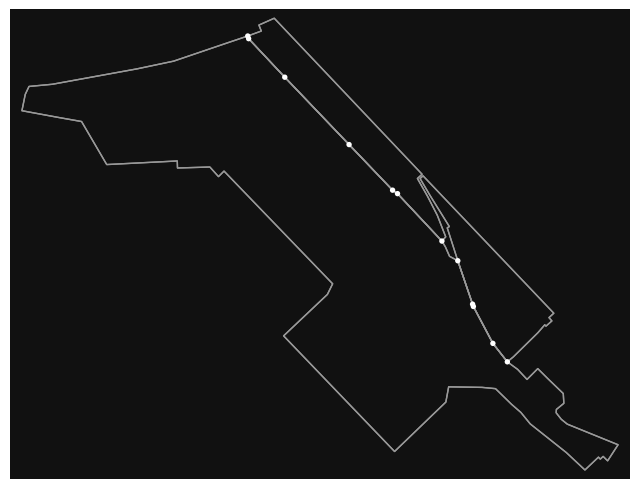

In [42]:
import osmnx as ox

my_filter = ('["industrial"~"port"]')
G = ox.graph_from_place("Saint Petersburg", retain_all=True, simplify = True, network_type='all', custom_filter=my_filter)
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)

fig, ax = ox.plot_graph(G)

___

Точки портов/ЖД/аэропортов/ -> путь -> точки сортировочных центров/складов

**План на 08.10.2024**

2. Делать проект по учебной практике, а именно:

    2.1. Выгрузка точек нужных мест, сформировать узлы и ребра и вывести график топологии СПб

    2.2. Разобраться с БД Neo4j

    2.3. Разобраться с FastAPI

    2.4. Сформировать информацию на собрание 09.10 